# Importing libraries and reading CSV files

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather = pd.read_csv ('../datasets/weather.csv')

| Feature     | File  | Description                                                                                                 |
|-------------|-------|-------------------------------------------------------------------------------------------------------------|
| Station     | Weather | date that the WNV test is performed                                                                         |
| Date        | Weather | approximate address of the location of trap\. This is used to send to the GeoCoder\.                        |
| Tmax        | Weather | the species of mosquitos                                                                                    |
| Tmin        | Weather | block number of address                                                                                     |
| Tavg        | Weather | street name                                                                                                 |
| Depart      | Weather | Id of the trap                                                                                              |
| DewPoint    | Weather | approximate address returned from GeoCoder                                                                  |
| WetBulb     | Weather | Latitude and Longitude returned from GeoCoder                                                               |
| Heat        | Weather | accuracy returned from GeoCoder                                                                             |
| Cool        | Weather | number of mosquitoes caught in this trap                                                                    |
| Sunrise     | Weather | whether West Nile Virus was present in these mosquitos\. 1 means WNV is present, and 0 means not present\.  |
| Sunset      | Weather |                                                                                                             |
| CodeSum     | Weather |                                                                                                             |
| Depth       | Weather |                                                                                                             |
| Water1      | Weather |                                                                                                             |
| SnowFall    | Weather |                                                                                                             |
| PrecipTotal | Weather |                                                                                                             |
| StnPressure | Weather |                                                                                                             |
| SeaLevel    | Weather |                                                                                                             |
| ResultSpeed | Weather |                                                                                                             |
| ResultDir   | Weather |                                                                                                             |
| AvgSpeed    | Weather |                                                                                                             |



In [3]:
weather.shape

(2944, 22)

In [4]:
weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [5]:
weather.columns = weather.columns.map(lambda x: x.lower())

In [6]:
weather.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint',
       'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'depth',
       'water1', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

In [7]:
weather.isnull().sum()

station        0
date           0
tmax           0
tmin           0
tavg           0
depart         0
dewpoint       0
wetbulb        0
heat           0
cool           0
sunrise        0
sunset         0
codesum        0
depth          0
water1         0
snowfall       0
preciptotal    0
stnpressure    0
sealevel       0
resultspeed    0
resultdir      0
avgspeed       0
dtype: int64

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
station        2944 non-null int64
date           2944 non-null object
tmax           2944 non-null int64
tmin           2944 non-null int64
tavg           2944 non-null object
depart         2944 non-null object
dewpoint       2944 non-null int64
wetbulb        2944 non-null object
heat           2944 non-null object
cool           2944 non-null object
sunrise        2944 non-null object
sunset         2944 non-null object
codesum        2944 non-null object
depth          2944 non-null object
water1         2944 non-null object
snowfall       2944 non-null object
preciptotal    2944 non-null object
stnpressure    2944 non-null object
sealevel       2944 non-null object
resultspeed    2944 non-null float64
resultdir      2944 non-null int64
avgspeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


Non-object features are: `Station`, `Tmax`, `Tmin`, `Dewpoint`, `ResultSpeed`, and `ResultDir`.
`.isnull()` should be enough to filter out null items

Need to check more in-depth for other object features

In [9]:
weather.head().T

,0,1,2,3,4
station,1,2,1,2,1
date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03
tmax,83,84,59,60,66
tmin,50,52,42,43,46
tavg,67,68,51,52,56
depart,14,M,-3,M,2
dewpoint,51,51,42,42,40
wetbulb,56,57,47,47,48
heat,0,0,14,13,9
cool,2,3,0,0,0


In [10]:
for i, column in enumerate(weather):
    print(weather.columns[i])
    print(weather[weather[column]=='M'][column].count())

station
0
date
0
tmax
0
tmin
0
tavg
11
depart
1472
dewpoint
0
wetbulb
4
heat
11
cool
11
sunrise
0
sunset
0
codesum
0
depth
1472
water1
2944
snowfall
1472
preciptotal
2
stnpressure
4
sealevel
9
resultspeed
0
resultdir
0
avgspeed
3


/opt/anaconda3/envs/DSI/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Station

In [11]:
weather.station.value_counts()

1    1472
2    1472
Name: station, dtype: int64

### Date

In [12]:
weather.date.value_counts().sum()

2944

In [13]:
weather.date.describe()

count           2944
unique          1472
top       2013-09-29
freq               2
Name: date, dtype: object

In [14]:
weather['date']

0       2007-05-01
1       2007-05-01
2       2007-05-02
3       2007-05-02
4       2007-05-03
           ...    
2939    2014-10-29
2940    2014-10-30
2941    2014-10-30
2942    2014-10-31
2943    2014-10-31
Name: date, Length: 2944, dtype: object

In [15]:
weather['date']=pd.to_datetime(weather['date'])

In [16]:
type(weather['date'])

pandas.core.series.Series

In [17]:
weather['date'].dt.year

0       2007
1       2007
2       2007
3       2007
4       2007
        ... 
2939    2014
2940    2014
2941    2014
2942    2014
2943    2014
Name: date, Length: 2944, dtype: int64

### Tmax

In [18]:
weather.tmax.unique()

array([ 83,  84,  59,  60,  66,  67,  78,  68,  82,  80,  77,  76,  70,
        73,  64,  65,  69,  90,  62,  61,  71,  79,  87,  89,  88,  75,
        85,  86,  81,  72,  63,  91,  92,  93,  74,  94,  54,  53,  56,
        57,  58,  55,  50,  95,  52,  47,  45,  51,  48,  44,  49,  46,
        96,  99, 100, 101,  97,  98, 102, 103, 104,  42,  41])

### Tmin

In [19]:
weather.tmin.unique()

array([50, 52, 42, 43, 46, 48, 49, 51, 53, 54, 47, 60, 61, 63, 56, 59, 44,
       57, 45, 55, 66, 65, 70, 68, 62, 67, 64, 58, 71, 69, 73, 75, 72, 74,
       39, 41, 40, 37, 34, 38, 35, 36, 33, 31, 32, 76, 77, 29, 78, 79, 80,
       81, 82, 83])

### Tavg

In [20]:
weather.tavg.unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

'M' is represented by missing data, hence dropping rows with 'M'

In [21]:
tavg_missing = weather['tavg'].map(lambda x: x == 'M')
tavg_missing.sum()

11

In [22]:
weather = weather[~tavg_missing]

In [23]:
weather['tavg'] = weather['tavg'].astype(float)

We will use average temperature for our feature and will be dropping **Tmin** and **Tmax**.

In [24]:
weather.drop('tmin', 1, inplace=True)
weather.drop('tmax', 1, inplace=True)

### Depart

In [25]:
weather.drop('depart', 1, inplace=True)

### DewPoint

In [26]:
weather.dewpoint.isnull().sum()

0

Dewpoint will be used in humidity function and after we add the humidity values, will be dropping this feature.

### WetBulb

In [27]:
wetbulb_missing = weather['wetbulb'].map(lambda x: x == 'M')
wetbulb_missing.sum()

4

In [28]:
weather = weather[~wetbulb_missing]

In [29]:
weather['wetbulb'] = weather['wetbulb'].astype(float)

Wetbulb will be used in humidity function and after we add the humidity values, will be dropping this feature.

### Heat

In [30]:
heat_missing = weather['heat'].map(lambda x: x == 'M')
heat_missing.sum()

0

We will be using average temperature as 

In [31]:
weather['heat'] = weather['heat'].astype(float)

### Cool

In [32]:
cool_missing = weather['cool'].map(lambda x: x == 'M')
cool_missing.sum()

0

In [33]:
weather['cool'] = weather['cool'].astype(float)

We will use average temperature for our feature and other temperature values will be dropped.

In [34]:
weather.drop('heat', 1, inplace=True)
weather.drop('cool', 1, inplace=True)

### Sunrise

In [35]:
sunrise_missing = weather['sunrise'].map(lambda x: x == 'M')
sunrise_missing.sum()

0

In [36]:
weather['sunrise'].value_counts().head()

-       1460
0416     104
0417      64
0419      40
0420      32
Name: sunrise, dtype: int64

### Sunset

In [37]:
sunset_missing = weather['sunset'].map(lambda x: x == 'M')
sunset_missing.sum()

0

In [38]:
weather['sunset'].value_counts().head()

-       1460
1931      95
1930      56
1929      48
1927      32
Name: sunset, dtype: int64

**Sunrise** and **Sunset** has too many non values so we will drop them.

In [39]:
weather.drop('sunrise', 1, inplace=True)
weather.drop('sunset', 1, inplace=True)

### CodeSum

In [40]:
codesum_missing = weather['codesum'].map(lambda x: x == 'M')
codesum_missing.sum()

0

In [41]:
weather['codesum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

We have decided to find continous values to define weather rather than weather description for our feature.

In [42]:
weather.drop('codesum', 1, inplace=True)

### Depth

In [43]:
depth_missing = weather['depth'].map(lambda x: x == 'M')
depth_missing.sum()

1460

In [44]:
weather['depth'].value_counts()

0    1469
M    1460
Name: depth, dtype: int64

Since ~half of the `depth` datas are missing, we will be dropping this column

In [45]:
weather.drop('depth', 1, inplace=True)

### Water1

In [46]:
water1_missing = weather['water1'].map(lambda val: val == 'M')
water1_missing.sum()

2929

In [47]:
weather['water1'].value_counts()

M    2929
Name: water1, dtype: int64

Since >half of the `water1` datas are missing, we will be dropping this column

In [48]:
weather.drop('water1', 1, inplace=True)

### SnowFall

In [49]:
snowFall_missing = weather['snowfall'].map(lambda x: x == 'M')
snowFall_missing.sum()

1460

In [50]:
weather['snowfall'].value_counts()

M      1460
0.0    1456
  T      12
0.1       1
Name: snowfall, dtype: int64

Doesnt make sense to keep this column with only 13 useful values. hence, drop `snowfall` feature

In [51]:
weather.drop('snowfall', 1, inplace=True)

### PrecipTotal

In [52]:
preciptotal_missing = weather['preciptotal'].map(lambda x: x == 'M')
preciptotal_missing.sum()

2

In [53]:
weather = weather[~preciptotal_missing]

In [54]:
weather['preciptotal'].value_counts().to_dict()

{'0.00': 1570,
 '  T': 317,
 '0.01': 126,
 '0.02': 63,
 '0.03': 46,
 '0.04': 35,
 '0.05': 32,
 '0.08': 28,
 '0.12': 28,
 '0.06': 26,
 '0.07': 23,
 '0.16': 21,
 '0.09': 21,
 '0.11': 20,
 '0.14': 19,
 '0.17': 17,
 '0.19': 14,
 '0.18': 14,
 '0.13': 14,
 '0.28': 14,
 '0.20': 13,
 '0.15': 13,
 '0.23': 11,
 '0.25': 11,
 '0.26': 11,
 '0.10': 10,
 '0.24': 10,
 '0.43': 9,
 '0.39': 9,
 '0.29': 9,
 '0.21': 9,
 '0.40': 9,
 '0.31': 9,
 '0.32': 8,
 '0.34': 8,
 '0.30': 7,
 '0.45': 7,
 '0.41': 7,
 '0.22': 7,
 '0.59': 7,
 '0.48': 7,
 '0.50': 7,
 '0.33': 7,
 '0.37': 7,
 '0.63': 6,
 '0.27': 6,
 '0.84': 6,
 '0.65': 6,
 '0.80': 6,
 '0.36': 5,
 '0.68': 5,
 '0.93': 5,
 '0.85': 5,
 '0.44': 5,
 '0.54': 5,
 '0.92': 5,
 '0.70': 4,
 '0.58': 4,
 '0.51': 4,
 '0.72': 4,
 '0.55': 4,
 '0.64': 4,
 '1.23': 4,
 '0.89': 4,
 '0.75': 4,
 '0.52': 4,
 '0.97': 4,
 '0.66': 3,
 '1.05': 3,
 '0.88': 3,
 '0.71': 3,
 '0.74': 3,
 '1.03': 3,
 '0.47': 3,
 '0.77': 3,
 '0.82': 3,
 '0.56': 3,
 '1.31': 3,
 '0.60': 3,
 '1.01': 3,
 '0.87': 3

In [55]:
#weather['preciptotal'] = weather['preciptotal'].astype(float)

In [56]:
weather.preciptotal = weather.preciptotal.map(lambda x: x.replace('T', '0.001')).astype(float)

### StnPressure

In [57]:
stnpressure_missing = weather['stnpressure'].map(lambda x: x == 'M')
stnpressure_missing.sum()

2

In [58]:
weather = weather[~stnpressure_missing]  

In [59]:
weather['stnpressure'] = weather['stnpressure'].map(float)

### SeaLevel

In [60]:
sealevel_missing = weather['sealevel'].map(lambda x: x == 'M')
sealevel_missing.sum()

7

In [61]:
weather = weather[~sealevel_missing]  

In [62]:
weather['sealevel'] = weather['sealevel'].map(float)

### ResultSpeed

In [63]:
weather.resultspeed.isnull().sum()

0

### ResultDir

In [64]:
weather.resultdir.isnull().sum()

0

### AvgSpeed

In [65]:
AvgSpeed_missing = weather['avgspeed'].map(lambda x: x == 'M')
AvgSpeed_missing.sum()

0

In [66]:
weather['avgspeed'] = weather['avgspeed'].map(float)

In [67]:
weather.head()

,station,date,tavg,dewpoint,wetbulb,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,67.0,51,56.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,68.0,51,57.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,51.0,42,47.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,52.0,42,47.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,56.0,40,48.0,0.0,29.39,30.12,11.7,7,11.9


In [68]:
weather.isnull().sum().sum()

0

In [69]:
# weather['rel_hum'] = 100 - 5*(((weather['tavg']-32)*5/9-(weather['dewpoint']-32)*5/9))

In [70]:
# weather.head(100)

In [71]:
# weather[weather['rel_hum']<50]

In [72]:
# weather['rel_hum'] = 100 - 5*(((weather['tavg']-32)*5/9-(weather['dewpoint']-32)*5/9))

In [73]:
((weather['dewpoint']-32)*5/9)+273.15

0       283.705556
1       283.705556
2       278.705556
3       278.705556
4       277.594444
           ...    
2939    274.261111
2940    274.261111
2941    274.816667
2942    269.261111
2943    271.483333
Name: dewpoint, Length: 2918, dtype: float64

In [74]:
weather['vap_pressure'] = 0.611* np.exp(5243 * ((1/273.15) - (1/(((weather['dewpoint']-32)*5/9)+273.15))))

In [75]:
weather['sat_vap_pressure'] = 0.611* np.exp(5243 * ((1/273.15) - (1/(((weather['tavg']-32)*5/9)+273.15))))

In [76]:
weather['rel_hum'] = 100 *weather['vap_pressure']/weather['sat_vap_pressure']

In [77]:
weather.head()

,station,date,tavg,dewpoint,wetbulb,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,vap_pressure,sat_vap_pressure,rel_hum
0,1,2007-05-01,67.0,51,56.0,0.0,29.10,29.82,1.7,27,9.2,1.247942,2.187858,57.039444
1,2,2007-05-01,68.0,51,57.0,0.0,29.18,29.82,2.7,25,9.6,1.247942,2.263431,55.134977
2,1,2007-05-02,51.0,42,47.0,0.0,29.38,30.09,13.0,4,13.4,0.895794,1.247942,71.781719
3,2,2007-05-02,52.0,42,47.0,0.0,29.44,30.08,13.3,2,13.4,0.895794,1.293839,69.235378
4,1,2007-05-03,56.0,40,48.0,0.0,29.39,30.12,11.7,7,11.9,0.830820,1.492846,55.653432


In [78]:
weather['rel_hum'].describe()

count    2918.000000
mean       62.787575
std        11.235566
min        30.751394
25%        54.896639
50%        62.213094
75%        69.818044
max       103.619896
Name: rel_hum, dtype: float64

In [79]:
weather[weather['rel_hum']>100]

,station,date,tavg,dewpoint,wetbulb,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,vap_pressure,sat_vap_pressure,rel_hum
2574,1,2013-10-31,55.0,56,57.0,1.04,28.69,29.45,9.4,24,11.5,1.492846,1.440694,103.619896


In [80]:
weather[2550:]

,station,date,tavg,dewpoint,wetbulb,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,vap_pressure,sat_vap_pressure,rel_hum
2573,2,2013-10-30,56.0,52,53.0,1.160,29.29,30.01,5.3,14,6.2,1.293839,1.492846,86.669284
2574,1,2013-10-31,55.0,56,57.0,1.040,28.69,29.45,9.4,24,11.5,1.492846,1.440694,103.619896
2575,2,2013-10-31,56.0,56,57.0,2.030,28.77,29.47,9.5,23,11.4,1.492846,1.492846,100.000000
2576,1,2014-05-01,46.0,38,42.0,0.090,29.02,29.74,13.5,24,13.4,0.770092,1.039525,74.081185
2577,2,2014-05-01,47.0,42,44.0,0.090,29.10,29.76,14.1,24,14.0,0.895794,1.078530,83.056989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,45.0,34,42.0,0.000,29.42,30.07,8.5,29,9.0,0.660409,1.001784,65.923300
2940,1,2014-10-30,42.0,34,40.0,0.000,29.34,30.09,5.1,24,5.5,0.660409,0.895794,73.723329
2941,2,2014-10-30,45.0,35,42.0,0.001,29.41,30.10,5.9,23,6.5,0.686431,1.001784,68.520813
2942,1,2014-10-31,40.0,25,33.0,0.030,29.49,30.20,22.6,34,22.9,0.463068,0.830820,55.736221


In [81]:
rel_hum = weather['rel_hum']
print(list(rel_hum).sort(reverse=True))

None


In [93]:
weather=weather.reset_index()

In [94]:
weather.head(10)

,index,station,date,tavg,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,vap_pressure,sat_vap_pressure,rel_hum
0,0,1,2007-05-01,67.0,0.000,29.10,29.82,1.7,27,9.2,1.247942,2.187858,57.039444
1,1,2,2007-05-01,68.0,0.000,29.18,29.82,2.7,25,9.6,1.247942,2.263431,55.134977
2,2,1,2007-05-02,51.0,0.000,29.38,30.09,13.0,4,13.4,0.895794,1.247942,71.781719
3,3,2,2007-05-02,52.0,0.000,29.44,30.08,13.3,2,13.4,0.895794,1.293839,69.235378
4,4,1,2007-05-03,56.0,0.000,29.39,30.12,11.7,7,11.9,0.830820,1.492846,55.653432
5,5,2,2007-05-03,58.0,0.000,29.46,30.12,12.9,6,13.2,0.830820,1.602220,51.854284
6,6,1,2007-05-04,58.0,0.001,29.31,30.05,10.4,8,10.8,0.862760,1.602220,53.847799
7,8,1,2007-05-05,60.0,0.001,29.40,30.10,11.7,7,12.0,0.770092,1.718673,44.807379
8,9,2,2007-05-05,60.0,0.001,29.46,30.09,11.2,7,11.5,0.799941,1.718673,46.544103
9,10,1,2007-05-06,59.0,0.000,29.57,30.29,14.4,11,15.0,0.564928,1.659538,34.041310


In [82]:
weather.drop('dewpoint', 1, inplace=True)
weather.drop('wetbulb', 1, inplace=True)

## Adding in station location

In [96]:
lat=[]
lon=[]
for i in range(len(weather['station'])):
    if weather['station'][i]==1:
        lat.append(41.995)
        lon.append(-87.933)
    else:
        lat.append(41.786)
        lon.append(-87.752)
#Midpoint=41.8905
weather['latitude']=lat
weather['longitude']=lon

In [97]:
weather.head().T

,0,1,2,3,4
index,0,1,2,3,4
station,1,2,1,2,1
date,2007-05-01 00:00:00,2007-05-01 00:00:00,2007-05-02 00:00:00,2007-05-02 00:00:00,2007-05-03 00:00:00
tavg,67,68,51,52,56
preciptotal,0,0,0,0,0
stnpressure,29.1,29.18,29.38,29.44,29.39
sealevel,29.82,29.82,30.09,30.08,30.12
resultspeed,1.7,2.7,13,13.3,11.7
resultdir,27,25,4,2,7
avgspeed,9.2,9.6,13.4,13.4,11.9


In [102]:
pd.DataFrame(weather).to_csv('../datasets/weather_clean.csv', index = False)

## Visualising Weather Data

In [85]:
weather['date'].dt.year.value_counts()

2010    368
2012    366
2008    366
2009    365
2014    365
2011    364
2007    364
2013    360
Name: date, dtype: int64

In [99]:
y2007=weather[weather['date'].dt.year==2007]
y2008=weather[weather['date'].dt.year==2008]
y2009=weather[weather['date'].dt.year==2009]
y2010=weather[weather['date'].dt.year==2010]
y2011=weather[weather['date'].dt.year==2011]
y2012=weather[weather['date'].dt.year==2012]
y2013=weather[weather['date'].dt.year==2013]
y2014=weather[weather['date'].dt.year==2014]




In [109]:
y2007['date'].dt.month

0       5
1       5
2       5
3       5
4       5
       ..
359    10
360    10
361    10
362    10
363    10
Name: date, Length: 364, dtype: int64

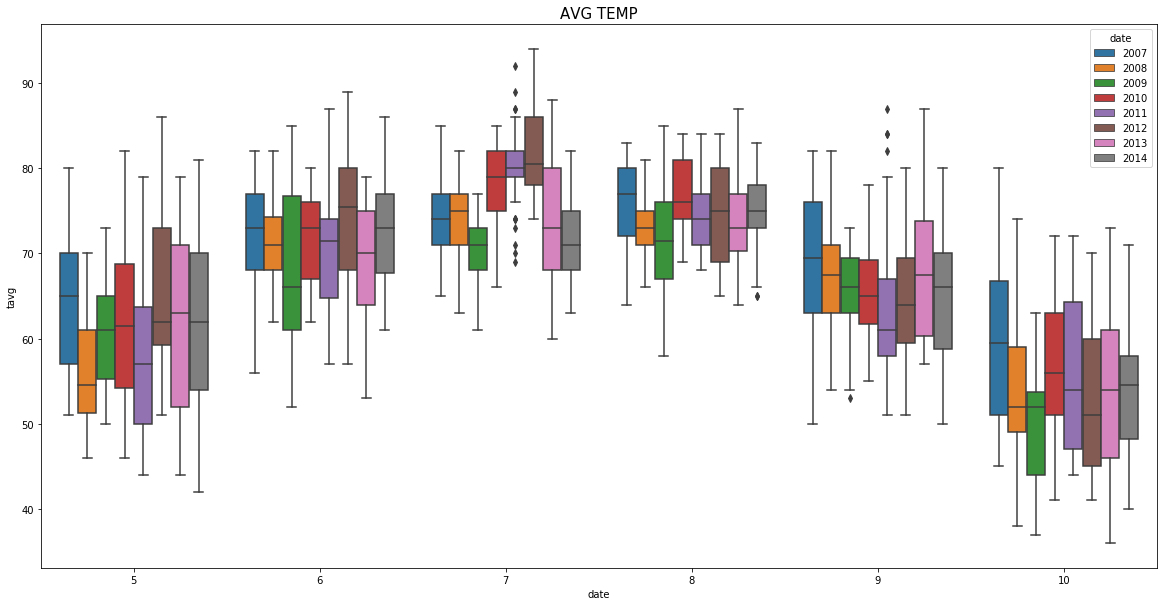

In [144]:
plt.figure(figsize=(20, 10))
ax_part = sns.boxplot(y='tavg',x=weather['date'].dt.month,hue=weather['date'].dt.year,data=weather)  # RUN PLOT 
 

plt.title("AVG TEMP",fontsize=15)
plt.show()

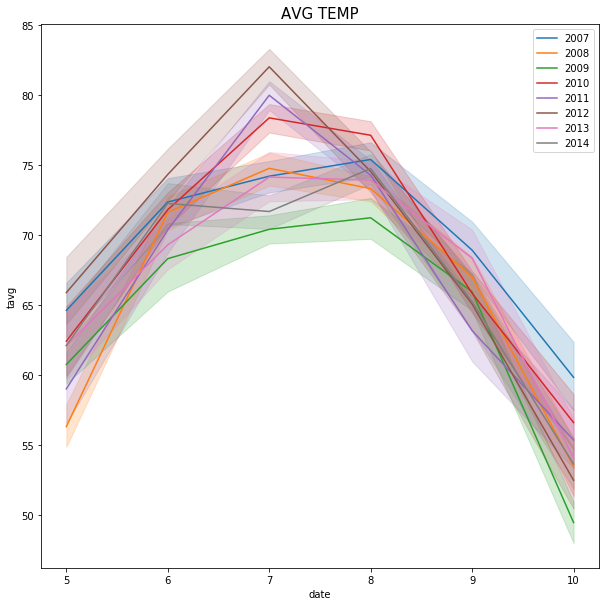

In [134]:
plt.figure(figsize=(10, 10))
ax_part = sns.lineplot(y='tavg',x=y2007['date'].dt.month,data=weather, label='2007')  # RUN PLOT 
ax_part = sns.lineplot(y='tavg',x=y2008['date'].dt.month,data=weather, label='2008') 
ax_part = sns.lineplot(y='tavg',x=y2009['date'].dt.month,data=weather, label='2009')  
ax_part = sns.lineplot(y='tavg',x=y2010['date'].dt.month,data=weather, label='2010')  
ax_part = sns.lineplot(y='tavg',x=y2011['date'].dt.month,data=weather, label='2011')  
ax_part = sns.lineplot(y='tavg',x=y2012['date'].dt.month,data=weather, label='2012')  
ax_part = sns.lineplot(y='tavg',x=y2013['date'].dt.month,data=weather, label='2013')  
ax_part = sns.lineplot(y='tavg',x=y2014['date'].dt.month,data=weather, label='2014')  
plt.title("AVG TEMP",fontsize=15)
plt.show()

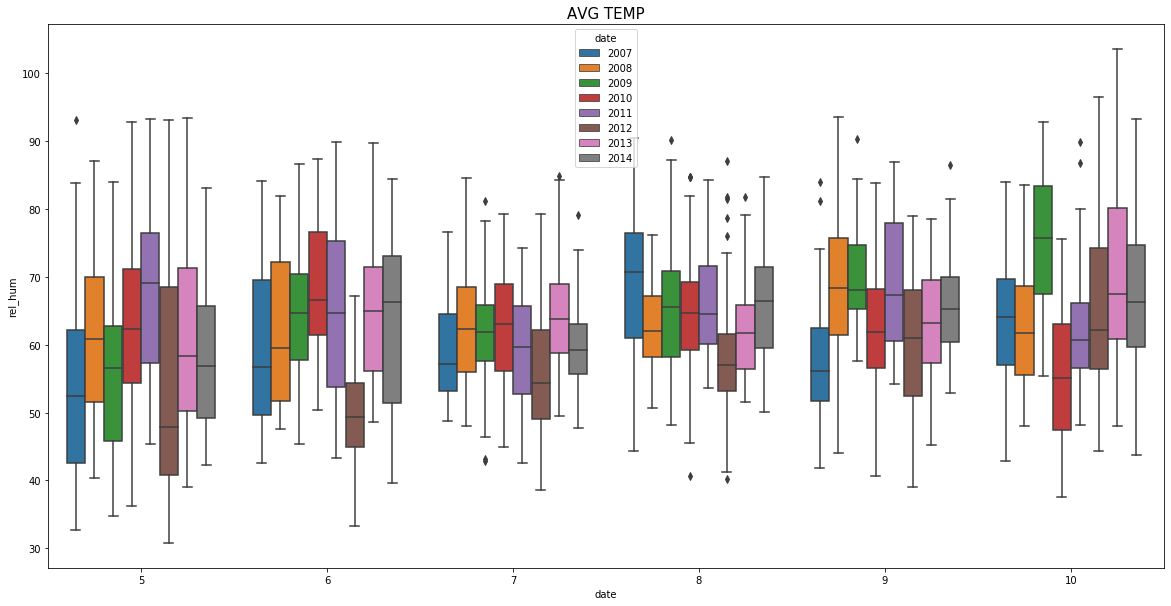

In [145]:
plt.figure(figsize=(20, 10))
ax_part = sns.boxplot(y='rel_hum',x=weather['date'].dt.month,hue=weather['date'].dt.year,data=weather)  # RUN PLOT 
 

plt.title("AVG TEMP",fontsize=15)
plt.show()

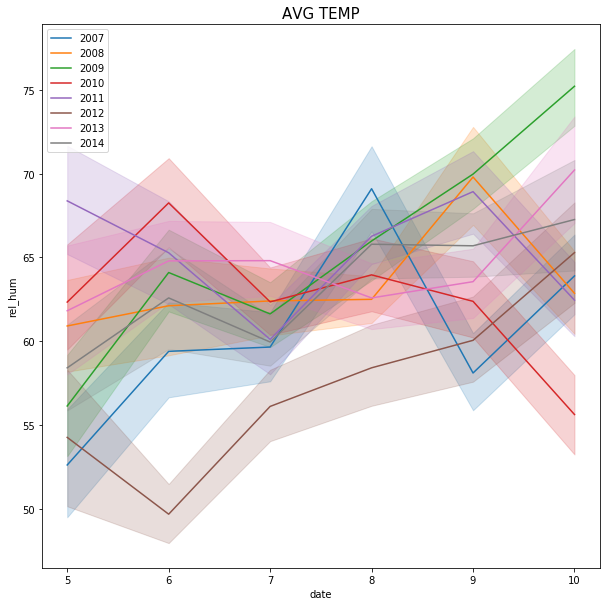

In [137]:
plt.figure(figsize=(10, 10))
ax_part = sns.lineplot(y='rel_hum',x=y2007['date'].dt.month,data=weather, label='2007')  # RUN PLOT 
ax_part = sns.lineplot(y='rel_hum',x=y2008['date'].dt.month,data=weather, label='2008') 
ax_part = sns.lineplot(y='rel_hum',x=y2009['date'].dt.month,data=weather, label='2009')  
ax_part = sns.lineplot(y='rel_hum',x=y2010['date'].dt.month,data=weather, label='2010')  
ax_part = sns.lineplot(y='rel_hum',x=y2011['date'].dt.month,data=weather, label='2011')  
ax_part = sns.lineplot(y='rel_hum',x=y2012['date'].dt.month,data=weather, label='2012')  
ax_part = sns.lineplot(y='rel_hum',x=y2013['date'].dt.month,data=weather, label='2013')  
ax_part = sns.lineplot(y='rel_hum',x=y2014['date'].dt.month,data=weather, label='2014')  
plt.title("AVG TEMP",fontsize=15)
plt.show()